### Data Preprocessing

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving BeyondBlue_Data.csv to BeyondBlue_Data.csv


In [ ]:
import pandas as pd

data = pd.read_csv("BeyondBlue_Data.csv")

data.head(5)

,text,category
0,"\nhey there, what physical symptoms of anxiety...",Anxiety
1,\nThere is a thread under Depression just like...,Anxiety
2,"\nHi everyone,\nI would love to hear your stor...",Anxiety
3,"\nHi Everyone,\nHere are some ideas for helpin...",Anxiety
4,"\nHi everyone, particularly any new members wh...",Anxiety


In [ ]:
from collections import Counter
Counter(data_2.loc[:, 'category'])

Counter({'Anxiety': 450, 'Depression': 447, 'Grief': 900})

In [ ]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize

contractions = {
    "ve": "have",
    "ll": "will",
    "m": "am",
}

data["text"] = [re.sub("\n", "", text) for text in data["text"]]
data['text'] = [re.sub("/", " or ", text) for text in data['text']]
data['text'] = [re.sub("[\.,']", " ", text) for text in data['text']]
data['text'] = [' '.join([contractions.get(word, word) for word in word_tokenize(text)]) for text in data['text']]
data['text'] = [' '.join([word for word in word_tokenize(text) if word.isalpha()==True]) for text in data['text']]
data["text"] = [text.lower() for text in data["text"]]
data["text"] = [text.strip() for text in data["text"]]

In [ ]:
data["tokens"] = [word_tokenize(text) for text in data["text"]]

In [ ]:
from nltk.corpus import stopwords

stopwords_eng = stopwords.words('english')
stopwords_eng.remove("not")
stopwords_eng += ["hi", "hey", "hello"]

data['imp_tokens'] = [[token for token in tokens if token not in stopwords_eng] for tokens in data['tokens']]

In [ ]:
# data = data.sample(frac=1, random_state=10) #shuffling the rows
data.head(10)

,text,category,tokens,imp_tokens
0,hey there what physical symptoms of anxiety do...,Anxiety,"[hey, there, what, physical, symptoms, of, anx...","[physical, symptoms, anxiety, experience, ofte..."
1,there is a thread under depression just like t...,Anxiety,"[there, is, a, thread, under, depression, just...","[thread, depression, like, thought, not, start..."
2,hi everyone i would love to hear your stories ...,Anxiety,"[hi, everyone, i, would, love, to, hear, your,...","[everyone, would, love, hear, stories, overcom..."
3,hi everyone here are some ideas for helping yo...,Anxiety,"[hi, everyone, here, are, some, ideas, for, he...","[everyone, ideas, helping, manage, symptoms, a..."
4,hi everyone particularly any new members who m...,Anxiety,"[hi, everyone, particularly, any, new, members...","[everyone, particularly, new, members, may, re..."
5,hi there as if that wasn t bad enough i also h...,Anxiety,"[hi, there, as, if, that, wasn, t, bad, enough...","[bad, enough, also, mild, cases, intellectual,..."
6,hi guys i have been thinking about writing abo...,Anxiety,"[hi, guys, i, have, been, thinking, about, wri...","[guys, thinking, writing, still, nervous, writ..."
7,hi first time posting on here or anywhere for ...,Anxiety,"[hi, first, time, posting, on, here, or, anywh...","[first, time, posting, anywhere, matter, stuff..."
8,i posted in a couple of other threads but i de...,Anxiety,"[i, posted, in, a, couple, of, other, threads,...","[posted, couple, threads, decided, start, new,..."
9,hey so i actually only find myself at these fo...,Anxiety,"[hey, so, i, actually, only, find, myself, at,...","[actually, find, forums, need, comfort, little..."


### Keyword Extraction

#### Tokens based

In [ ]:
from wordcloud import WordCloud

cloud = WordCloud()

grief_string = ''
anxiety_string = ''
depression_string = ''

for tokens, categ in zip(data['imp_tokens'], data['category']):
  if categ == 'Grief':
    grief_string += ' '.join(tokens)
    grief_string += ' '
  elif categ == 'Anxiety':
    anxiety_string += ' '.join(tokens)
    anxiety_string += ' '
  else:
    depression_string += ' '.join(tokens)
    depression_string += ' '

cloud.generate(grief_string)
cloud.to_file("griefCloud_0.png")

cloud.generate(anxiety_string)
cloud.to_file("anxietyCloud_0.png")

cloud.generate(depression_string)
cloud.to_file("depressionCloud_0.png")

#### Vocabulary

In [ ]:
from collections import Counter

grief_vocab = Counter()
depression_vocab = Counter()
anxiety_vocab = Counter()

for index, row in data.iterrows():
  if(row['category']=='Grief'):
    grief_vocab.update(row['imp_tokens'])
  elif(row['category']=='Anxiety'):
    anxiety_vocab.update(row['imp_tokens'])
  else:
    depression_vocab.update(row['imp_tokens'])

##### Non-Disjoint vocabulary

In [ ]:
cloud = WordCloud(collocations=False)

string = ''
for word in grief_vocab.keys():
  string += (word + ' ') * grief_vocab[word]

cloud.generate(string)
cloud.to_file("griefCloud_common.png")

In [ ]:
string = ''
for word in anxiety_vocab.keys():
  string += (word + ' ') * anxiety_vocab[word]

cloud.generate(string)
cloud.to_file("anxietyCloud_common.png")

In [ ]:
string = ''
for word in depression_vocab.keys():
  string += (word + ' ') * depression_vocab[word]

cloud.generate(string)
cloud.to_file("depressionCloud_common.png")

##### Disjoint Vocabulary

In [ ]:
for word in grief_vocab.keys():
  if word in anxiety_vocab.keys() or word in depression_vocab.keys():
    grief_vocab[word] = 0

for word in depression_vocab.keys():
  if word in anxiety_vocab.keys() or word in grief_vocab.keys():
    depression_vocab[word] = 0

for word in anxiety_vocab.keys():
  if word in grief_vocab.keys() or word in depression_vocab.keys():
    anxiety_vocab[word] = 0

In [ ]:
string = ''
for word in grief_vocab.keys():
  string += (word + ' ') * grief_vocab[word]

cloud.generate(string)
cloud.to_file("griefCloud.png")

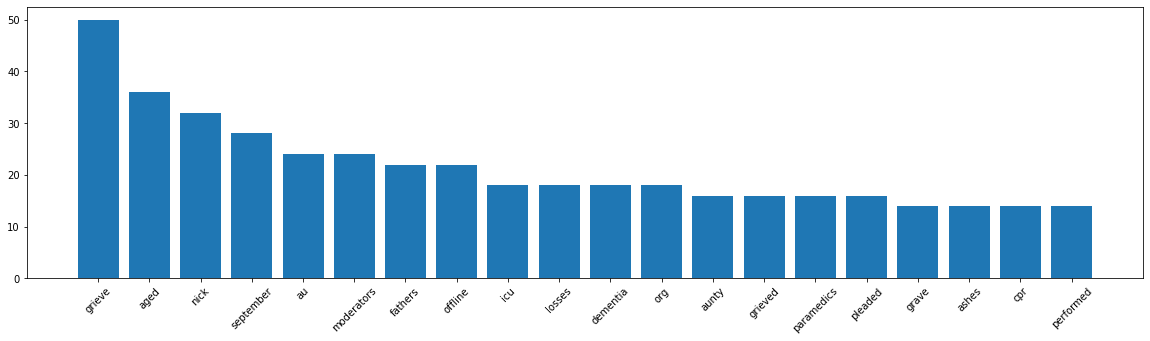

In [ ]:
import matplotlib.pyplot as plt

plot_data = dict(grief_vocab.most_common(20))
plt.figure(figsize = (20,5))
plt.bar(plot_data.keys(), plot_data.values())
plt.xticks(rotation=45)
plt.show()

In [ ]:
string = ''
for word in anxiety_vocab.keys():
  string += (word + ' ') * anxiety_vocab[word]

cloud.generate(string)
cloud.to_file("anxietyCloud.png")

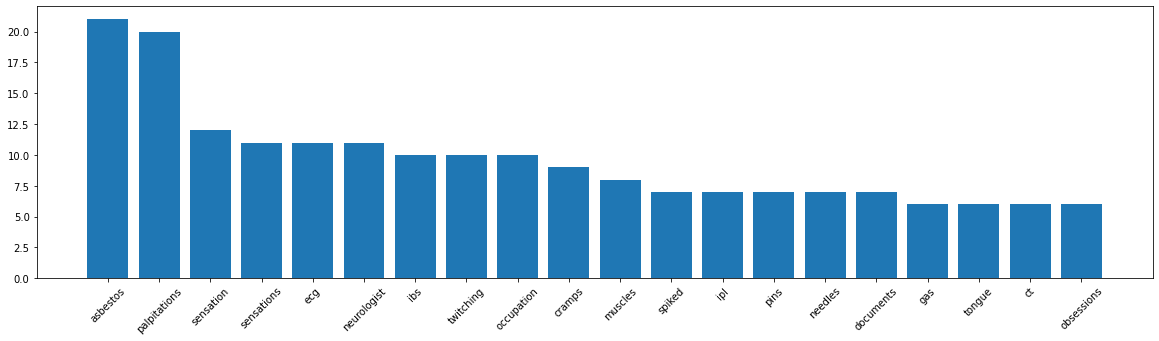

In [ ]:
plot_data = dict(anxiety_vocab.most_common(20))

plt.figure(figsize = (20, 5))
plt.bar(plot_data.keys(), plot_data.values())
plt.xticks(rotation=45)
plt.show()

In [ ]:
string = ''
for word in depression_vocab.keys():
  string += (word + ' ') * depression_vocab[word]

cloud.generate(string)
cloud.to_file("depressionCloud.png")

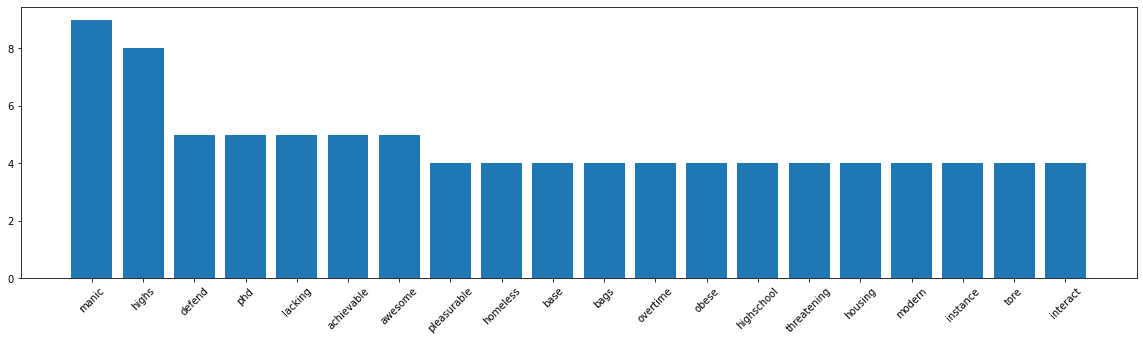

In [ ]:
plot_data = dict(depression_vocab.most_common(20))

plt.figure(figsize = (20, 5))
plt.bar(plot_data.keys(), plot_data.values())
plt.xticks(rotation=45)
plt.show()

### Sentiment Analysis

#### Naive Bayes

In [ ]:
category = {'Grief': 0, 'Anxiety': 1, 'Depression': 2}
data["category"] = [category.get(categ) for categ in data['category']]

data.head(5)

,text,category,tokens,imp_tokens
0,hey there what physical symptoms of anxiety do...,1,"[hey, there, what, physical, symptoms, of, anx...","[physical, symptoms, anxiety, experience, ofte..."
1,there is a thread under depression just like t...,1,"[there, is, a, thread, under, depression, just...","[thread, depression, like, thought, not, start..."
2,hi everyone i would love to hear your stories ...,1,"[hi, everyone, i, would, love, to, hear, your,...","[everyone, would, love, hear, stories, overcom..."
3,hi everyone here are some ideas for helping yo...,1,"[hi, everyone, here, are, some, ideas, for, he...","[everyone, ideas, helping, manage, symptoms, a..."
4,hi everyone particularly any new members who m...,1,"[hi, everyone, particularly, any, new, members...","[everyone, particularly, new, members, may, re..."


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag

lemmatizer = WordNetLemmatizer()
lemmas = []
for tokens in data['imp_tokens']:
  temp = []
  for token, pos in pos_tag(tokens):
    if pos.startswith('NN'):
      pos = 'n'
    elif pos.startswith('VB'):
      pos = 'v'
    else:
      pos = 'a'
    temp.append(lemmatizer.lemmatize(token, pos))
  lemmas.append(temp)

data['lemmas'] = lemmas

In [ ]:
data.head(10)

,text,category,tokens,imp_tokens,lemmas
0,hey there what physical symptoms of anxiety do...,1,"[hey, there, what, physical, symptoms, of, anx...","[physical, symptoms, anxiety, experience, ofte...","[physical, symptom, anxiety, experience, often..."
1,there is a thread under depression just like t...,1,"[there, is, a, thread, under, depression, just...","[thread, depression, like, thought, not, start...","[thread, depression, like, thought, not, start..."
2,hi everyone i would love to hear your stories ...,1,"[hi, everyone, i, would, love, to, hear, your,...","[everyone, would, love, hear, stories, overcom...","[everyone, would, love, hear, story, overcome,..."
3,hi everyone here are some ideas for helping yo...,1,"[hi, everyone, here, are, some, ideas, for, he...","[everyone, ideas, helping, manage, symptoms, a...","[everyone, idea, help, manage, symptom, anxiet..."
4,hi everyone particularly any new members who m...,1,"[hi, everyone, particularly, any, new, members...","[everyone, particularly, new, members, may, re...","[everyone, particularly, new, member, may, rea..."
5,hi there as if that wasn t bad enough i also h...,1,"[hi, there, as, if, that, wasn, t, bad, enough...","[bad, enough, also, mild, cases, intellectual,...","[bad, enough, also, mild, case, intellectual, ..."
6,hi guys i have been thinking about writing abo...,1,"[hi, guys, i, have, been, thinking, about, wri...","[guys, thinking, writing, still, nervous, writ...","[guy, think, write, still, nervous, write, fig..."
7,hi first time posting on here or anywhere for ...,1,"[hi, first, time, posting, on, here, or, anywh...","[first, time, posting, anywhere, matter, stuff...","[first, time, post, anywhere, matter, stuff, o..."
8,i posted in a couple of other threads but i de...,1,"[i, posted, in, a, couple, of, other, threads,...","[posted, couple, threads, decided, start, new,...","[post, couple, thread, decide, start, new, one..."
9,hey so i actually only find myself at these fo...,1,"[hey, so, i, actually, only, find, myself, at,...","[actually, find, forums, need, comfort, little...","[actually, find, forums, need, comfort, little..."


In [ ]:
dataset = []
for tokens, categ in zip(data['lemmas'], data['category']):
  temp = {token: True for token in tokens}
  dataset.append((temp, categ))
train_data = dataset[:int(len(dataset)*0.7)]
test_data = dataset[int(len(dataset)*0.7):]

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(20))

Accuracy is: 0.9537037037037037
Most Informative Features
                   grief = True                0 : 1      =     67.9 : 1.0
                 funeral = True                0 : 1      =     32.1 : 1.0
                  grieve = True                0 : 2      =     25.1 : 1.0
                 goodbye = True                0 : 1      =     19.6 : 1.0
               devastate = True                0 : 1      =     17.9 : 1.0
                 breathe = True                1 : 2      =     16.9 : 1.0
                     ocd = True                1 : 0      =     15.7 : 1.0
                  cancer = True                0 : 2      =     15.5 : 1.0
                   death = True                0 : 2      =     13.8 : 1.0
                    loss = True                0 : 2      =     13.7 : 1.0
                 suicide = True                0 : 1      =     13.5 : 1.0
              unexpected = True                0 : 1      =     12.9 : 1.0
                 sibling = True           